In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df=pd.read_csv("Data Set/heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.select_dtypes(include=["int64","float64"])

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [9]:
df.replace({"Yes":1,"No":0},inplace=True)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [21]:
df["Diabetic"].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [22]:
df["Diabetic"].replace({1:1,0:2,"No, borderline diabetes":3,"Yes (during pregnancy)":4}, inplace=True)

In [23]:
df["AgeCategory"].replace({'18-24':1,'25-29':2,'30-34':3,'35-39':4,'40-44':5,'45-49':6, '50-54':7,'55-59':8, '60-64':9,'65-69':10,'70-74':11,'75-79':12,  '80 or older':13}, inplace=True)

In [25]:
df["Sex"].replace({"Male":1, "Female":0}, inplace=True)

In [26]:
df["Race"].replace({'White':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5,'Hispanic':6}, inplace=True)

In [27]:
df["GenHealth"].replace({'Very good':1,'Fair':2,'Good':3,'Poor':4,'Excellent':5}, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [30]:
df.select_dtypes(include=["int64","float64"])

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,1,2,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,1,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,1,2,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,6,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,6,2,1,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,6,2,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,6,2,0,3,12.0,0,0,0


In [31]:
corr_matrix = df.corr()
print(corr_matrix)

                  HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
HeartDisease          1.000000  0.051803  0.107764        -0.032080  0.196835   
BMI                   0.051803  1.000000  0.023118        -0.038816  0.019733   
Smoking               0.107764  0.023118  1.000000         0.111768  0.061226   
AlcoholDrinking      -0.032080 -0.038816  0.111768         1.000000 -0.019858   
Stroke                0.196835  0.019733  0.061226        -0.019858  1.000000   
PhysicalHealth        0.170721  0.109788  0.115352        -0.017254  0.137014   
MentalHealth          0.028591  0.064131  0.085157         0.051282  0.046467   
DiffWalking           0.201258  0.181678  0.120074        -0.035328  0.174143   
Sex                   0.070040  0.026940  0.085052         0.004200 -0.003091   
AgeCategory           0.233432 -0.004744  0.128331        -0.059528  0.137822   
Race                 -0.039285  0.030883 -0.061821        -0.021080 -0.016025   
Diabetic             -0.1473

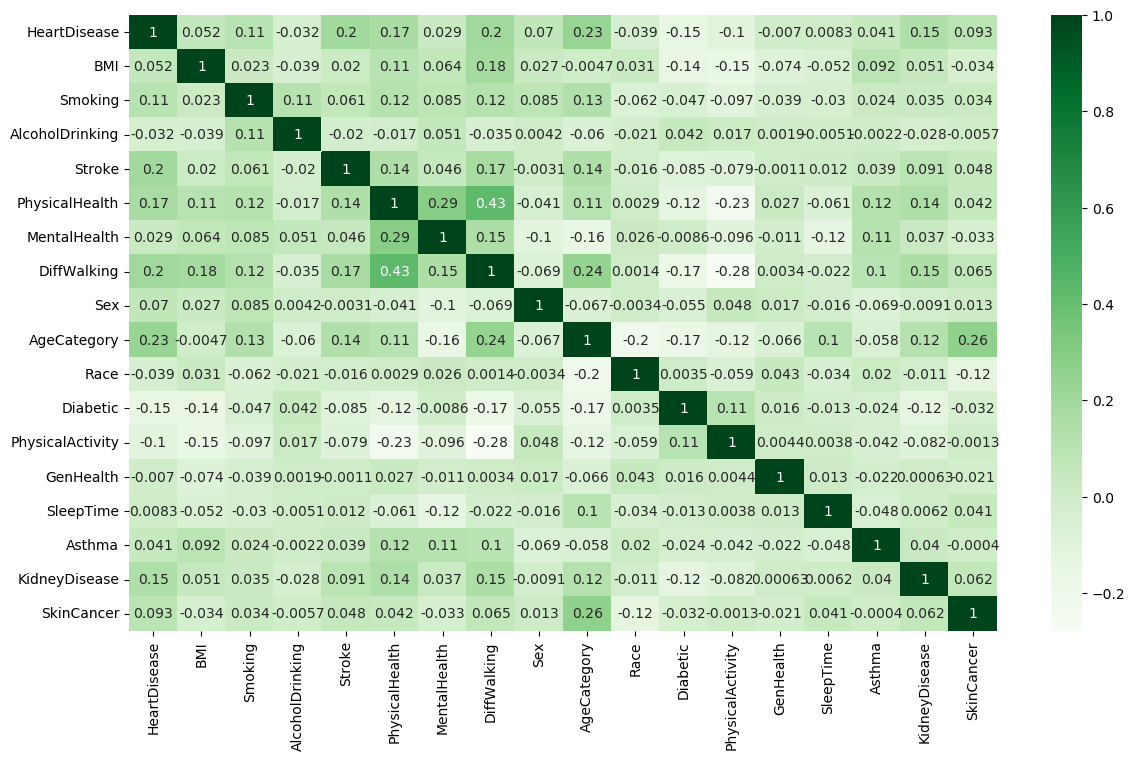

In [36]:
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix,annot=True,cmap="Greens")

In [37]:
imp_cols=["HeartDisease","BMI","Smoking","AlcoholDrinking","Stroke","PhysicalHealth","MentalHealth","DiffWalking","Diabetic","PhysicalActivity","Asthma","KidneyDisease"]
imp_cols

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Diabetic',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease']

In [38]:
training_data=df[imp_cols]
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,Asthma,KidneyDisease
0,0,16.60,1,0,0,3.0,30.0,0,1,1,1,0
1,0,20.34,0,0,1,0.0,0.0,0,2,1,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,1,0
3,0,24.21,0,0,0,0.0,0.0,0,2,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,2,1,1,0
319792,0,24.24,0,0,0,0.0,0.0,0,2,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,2,0,0,0


In [39]:
x=training_data.drop(columns=["HeartDisease"])
y=training_data["HeartDisease"]

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=50)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223856 entries, 177949 to 103904
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               223856 non-null  float64
 1   Smoking           223856 non-null  int64  
 2   AlcoholDrinking   223856 non-null  int64  
 3   Stroke            223856 non-null  int64  
 4   PhysicalHealth    223856 non-null  float64
 5   MentalHealth      223856 non-null  float64
 6   DiffWalking       223856 non-null  int64  
 7   Diabetic          223856 non-null  int64  
 8   PhysicalActivity  223856 non-null  int64  
 9   Asthma            223856 non-null  int64  
 10  KidneyDisease     223856 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 20.5 MB


In [42]:
LR=LogisticRegression()

In [43]:
LR.fit(X_train,Y_train)

c:\Users\Rudra\miniconda3\envs\machinelearningintel\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred=LR.predict(X_test)

In [48]:
mean_absolute_percentage_error(Y_test,y_pred)

23893642943240.914

In [49]:
accuracy_score(Y_test,y_pred)

0.915654738948707